Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables. Here is a link to the “Auto MPG” dataset in the UC Irvine data repository: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame. 
2. Review the data and the provided data set description.
3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.
4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.
5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’
6. Create a bar chart that shows the distribution for cylinders.
7. Create a scatterplot that shows the relationship between horsepower and weight.
8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

### Python Code for Imports and Reading the Data
To begin, we will import the standard libraries needed, read in the data, and display the DataFrame.

In [1]:
# standard imports for matplotlib, numpy, pandas, and seaborn
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# enable inline plotting
%matplotlib inline

# url link for Auto MPG data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# column names from Auto MPG Names attribute section
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
           'acceleration', 'model year', 'origin', 'car name']

# read url using read_csv with delim_whitespace set to true, and column names to "columns"
df = pd.read_csv(url, delim_whitespace=True, names=columns)

# make a copy of DataFrame to preserve origanal import
auto_mpg = df.copy()

# view first 5 rows 
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Dataset Description
This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".
> "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

In [2]:
# view pandaas description of DataFrame 
auto_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Not all data generated from describe() makes sense (ex: mean for origin is a mathmatical computation, whereas it represents a graphical location within this data), but we are able to see some useful values like the min and max for cylinders and model year. This allows us to see the range of our data. 

###  Cleaning Up the Horsepower Values
Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

In [3]:
# get index values where horsepower is set to '?'
hp_unknown = auto_mpg[auto_mpg.horsepower == '?'].index

# update DataFrame inplace, set '?' to np.NaN
auto_mpg.horsepower.replace('?', np.NaN, inplace=True)

# convert horsepower column to numeric
auto_mpg.horsepower = pd.to_numeric(auto_mpg.horsepower)

# view rows that were updated
auto_mpg.iloc[hp_unknown]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


We can see the horsepower column updated to 'NaN' for the 6 rows that we updated.

In [4]:
# view datatypes of columns
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

We can see that the horsepower column is now type float64 instead of an object. 

### Convert Origins Column to New Values
The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [5]:
# use function with if/elif/else to covert
auto_mpg.origin = auto_mpg.origin.apply(lambda x: 'USA' if x == 1 else ('Asia' if x == 2 else 'Europe'))

Doing a value count on the origin column confirms that the update worked properly.

In [6]:
# use value_counts() to confirm orgin update
auto_mpg.origin.value_counts()

USA       249
Europe     79
Asia       70
Name: origin, dtype: int64

### Bar and Scatter Plots
#### 1. Create a bar chart that shows the distribution for cylinders.

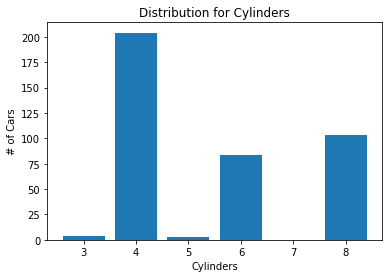

In [7]:
# get the number of cars for each cylinders, save to dict
d_cylinders = auto_mpg.cylinders.value_counts().to_dict()

# plot bars with dict keys as x-axis and dict values as y-axis
plt.bar(d_cylinders.keys(), d_cylinders.values())

# set chart labels and title
plt.xlabel('Cylinders')
plt.ylabel('# of Cars')
plt.title('Distribution for Cylinders')

# display plot
plt.show()

#### 2. Create a scatterplot that shows the relationship between horsepower and weight.

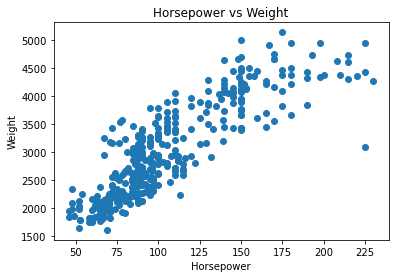

In [8]:
# plot scatter with dict keys as x-axis and dict values as y-axis
plt.scatter(auto_mpg.horsepower, auto_mpg.weight)

# set chart labels and title
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.title('Horsepower vs Weight')

# display plot
plt.show()

Looking at both plots:
1. There are more cars that have 4 cylinders than any other number.
2. Cars with lower horsepower tend weigh less then those with higher horsepower. Also, there are more cars with lower horsepower and weight than heavier and higher horsepower.

### Seaborn Plot
What is the relationship between weight, acceleration, and miles per gallon in terms of each cars origin?

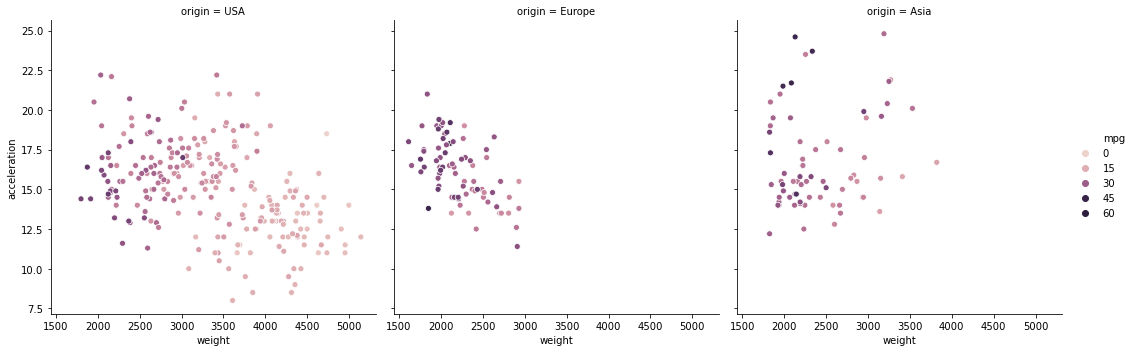

In [9]:
# create a visualization using relationship plot
sns.relplot(
    data = auto_mpg, 
    x = 'weight',
    y = 'acceleration',
    hue = 'mpg',
    col = 'origin'
)

Looking at each chart generated, we can see that acceleration **generally decreased** as the weight of a the vehicle increased. When inspecting the charts for Europe and Asia, we can see that they didn't have as many cars as the USA, and the weight of their vehicles did not weigh as much either. Vehicles originating from the USA and Europe had similar trends in terms of miles per gallon. The miles per gallon decreased as the weight of the vehicle increased, especially when getting close to and over 3000. Asian vehicles didn't follow the same trend and had a slight increase in acceleration as the weight approached 3000.